In [31]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('C:\\Users\\renan\\Desktop\\inequality\\inequality')

from dissimilarity import Dissim
from spatial_dissimilarity import Spatial_Dissim
from entropy import Entropy
from perimeter_area_ratio_spatial_dissimilarity import Perimeter_Area_Ratio_Spatial_Dissim
from absolute_centralization import Absolute_Centralization
from absolute_concentration import Absolute_Concentration
from atkinson import Atkinson
from bias_corrected_dissimilarity import Bias_Corrected_Dissim
from boundary_spatial_dissimilarity import Boundary_Spatial_Dissim
from conprof import Con_Prof
from correlationr import Correlation_R
from delta import Delta
from density_corrected_dissimilarity import Density_Corrected_Dissim
from exposure import Exposure
from gini_seg import Gini_Seg
from isolation import Isolation
from modified_dissimilarity import Modified_Dissim
from modified_gini_seg import Modified_Gini_Seg
from relative_centralization import Relative_Centralization
from relative_clustering import Relative_Clustering
from relative_concentration import Relative_Concentration
from spatial_exposure import Spatial_Exposure
from spatial_isolation import Spatial_Isolation
from spatial_prox_profile import Spatial_Prox_Prof
from infer_segregation import Infer_Segregation
from compare_segregation import Compare_Segregation
from spatial_proximity import Spatial_Proximity

In [32]:
os.chdir('C:/Users/renan/Desktop/full_count_2010')
census_2010 = pd.read_csv('std_2010_fullcount.csv', encoding = "ISO-8859-1", sep = ",")

In [33]:
df = census_2010.loc[census_2010.county == "Riverside County"][['trtid10', 'pop10','nhblk10']]
map_url = 'https://raw.githubusercontent.com/renanxcortes/inequality-segregation-supplementary-files/master/Tracts_grouped_by_County/06065.json'
map_gpd = gpd.read_file(map_url)
map_gpd['INTGEOID10'] = pd.to_numeric(map_gpd["GEOID10"])
gdf_pre = map_gpd.merge(df, left_on = 'INTGEOID10', right_on = 'trtid10')
gdf = gdf_pre[['geometry', 'pop10', 'nhblk10']]

gdf['share'] = np.where(gdf['pop10'] == 0, 0, gdf['nhblk10'] / gdf['nhblk10'].sum())
gdf['rel']   = np.where(gdf['pop10'] == 0, 0, gdf['nhblk10'] / gdf['pop10'])


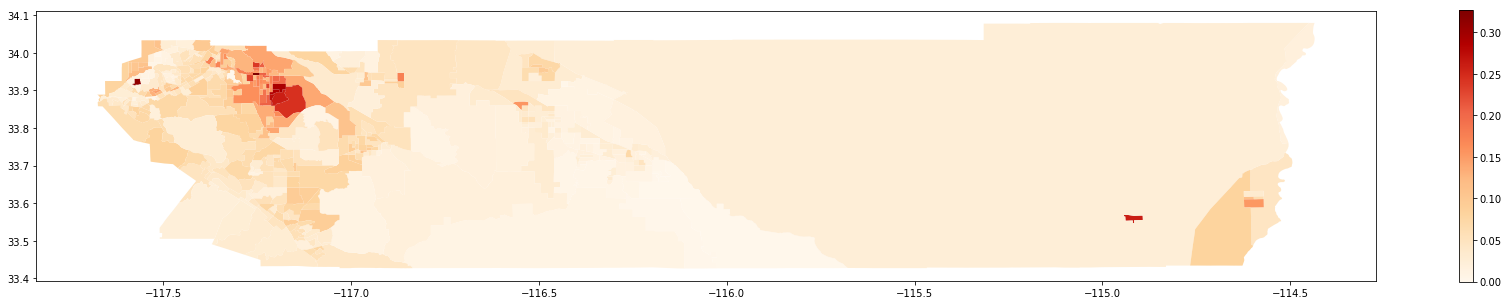

In [34]:
import matplotlib
ax1 = gdf.plot(column='rel',
               cmap = 'OrRd', 
               figsize=(30,5),
               legend = True)

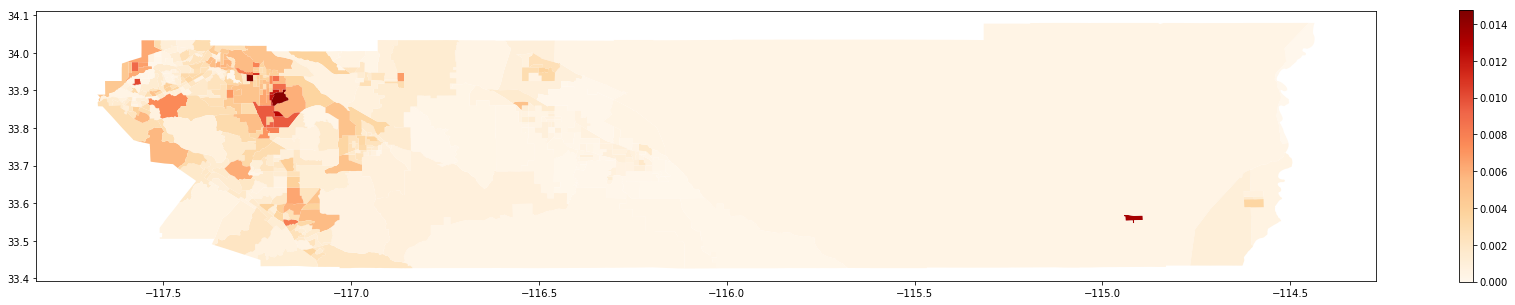

In [35]:
ax1 = gdf.plot(column='share',
               cmap = 'OrRd', 
               figsize=(30,5),
               legend = True)

In [36]:
# Non-Spatial measures
D = Dissim(df, 'nhblk10', 'pop10')
G = Gini_Seg(df, 'nhblk10', 'pop10')
H = Entropy(df, 'nhblk10', 'pop10')
A = Atkinson(df, 'nhblk10', 'pop10')
xPy = Exposure(df, 'nhblk10', 'pop10')
xPx = Isolation(df, 'nhblk10', 'pop10')
R = Con_Prof(df, 'nhblk10', 'pop10')
Dbc = Bias_Corrected_Dissim(df, 'nhblk10', 'pop10')
Ddc = Density_Corrected_Dissim(df, 'nhblk10', 'pop10')
V = Correlation_R(df, 'nhblk10', 'pop10')
Dct = Modified_Dissim(df, 'nhblk10', 'pop10')
Gct = Modified_Gini_Seg(df, 'nhblk10', 'pop10')

In [37]:
# Spatial measures
SD = Spatial_Dissim(gdf, 'nhblk10', 'pop10')
PARD = Perimeter_Area_Ratio_Spatial_Dissim(gdf, 'nhblk10', 'pop10')
BSD = Boundary_Spatial_Dissim(gdf, 'nhblk10', 'pop10')
ACE = Absolute_Centralization(gdf, 'nhblk10', 'pop10')
ACO = Absolute_Concentration(gdf, 'nhblk10', 'pop10')
DEL = Delta(gdf, 'nhblk10', 'pop10')
RCE = Relative_Centralization(gdf, 'nhblk10', 'pop10')
RCL = Relative_Clustering(gdf, 'nhblk10', 'pop10')
RCO = Relative_Concentration(gdf, 'nhblk10', 'pop10')
SxPy = Spatial_Exposure(gdf, 'nhblk10', 'pop10')
SxPx = Spatial_Isolation(gdf, 'nhblk10', 'pop10')
SPP = Spatial_Prox_Prof(gdf, 'nhblk10', 'pop10')
SP = Spatial_Proximity(gdf, 'nhblk10', 'pop10')

In [38]:
overall_iterations_frequency = 500

### Riverside in 2010: systematic approach

In [39]:
all_measures = (D, G, H, xPx, xPy, A, V, R, Dct, Gct, Dbc, Ddc, SPP, SD, BSD, PARD, SxPx, SxPy, SP, RCL, DEL, ACO, RCO, ACE, RCE)

Dissim Time = 1.2661187648773193
Gini_Seg Time = 2.935238838195801
Entropy Time = 1.6766791343688965
Isolation Time = 1.2262282371520996
Exposure Time = 1.37418532371521
Atkinson Time = 1.4550902843475342
Correlation_R Time = 1.244537591934204
Con_Prof Time = 214.82947182655334
Modified_Dissim Time = 582.8131020069122
Modified_Gini_Seg Time = 1335.781176328659
Bias_Corrected_Dissim Time = 597.3644645214081
Density_Corrected_Dissim Time = 9235.9033472538
Spatial_Prox_Prof Time = 786.1482417583466
Spatial_Dissim Time = 188.71954369544983
Boundary_Spatial_Dissim Time = 1297.731348991394
Perimeter_Area_Ratio_Spatial_Dissim Time = 1039.6047897338867
Spatial_Isolation Time = 14.214974880218506
Spatial_Exposure Time = 14.628520250320435
Spatial_Proximity Time = 14.866140842437744
Relative_Clustering Time = 13.967203378677368
Delta Time = 2.4518301486968994
Absolute_Concentration Time = 5.909212112426758
Relative_Concentration Time = 5.927533864974976
Absolute_Centralization Time = 12.62470149

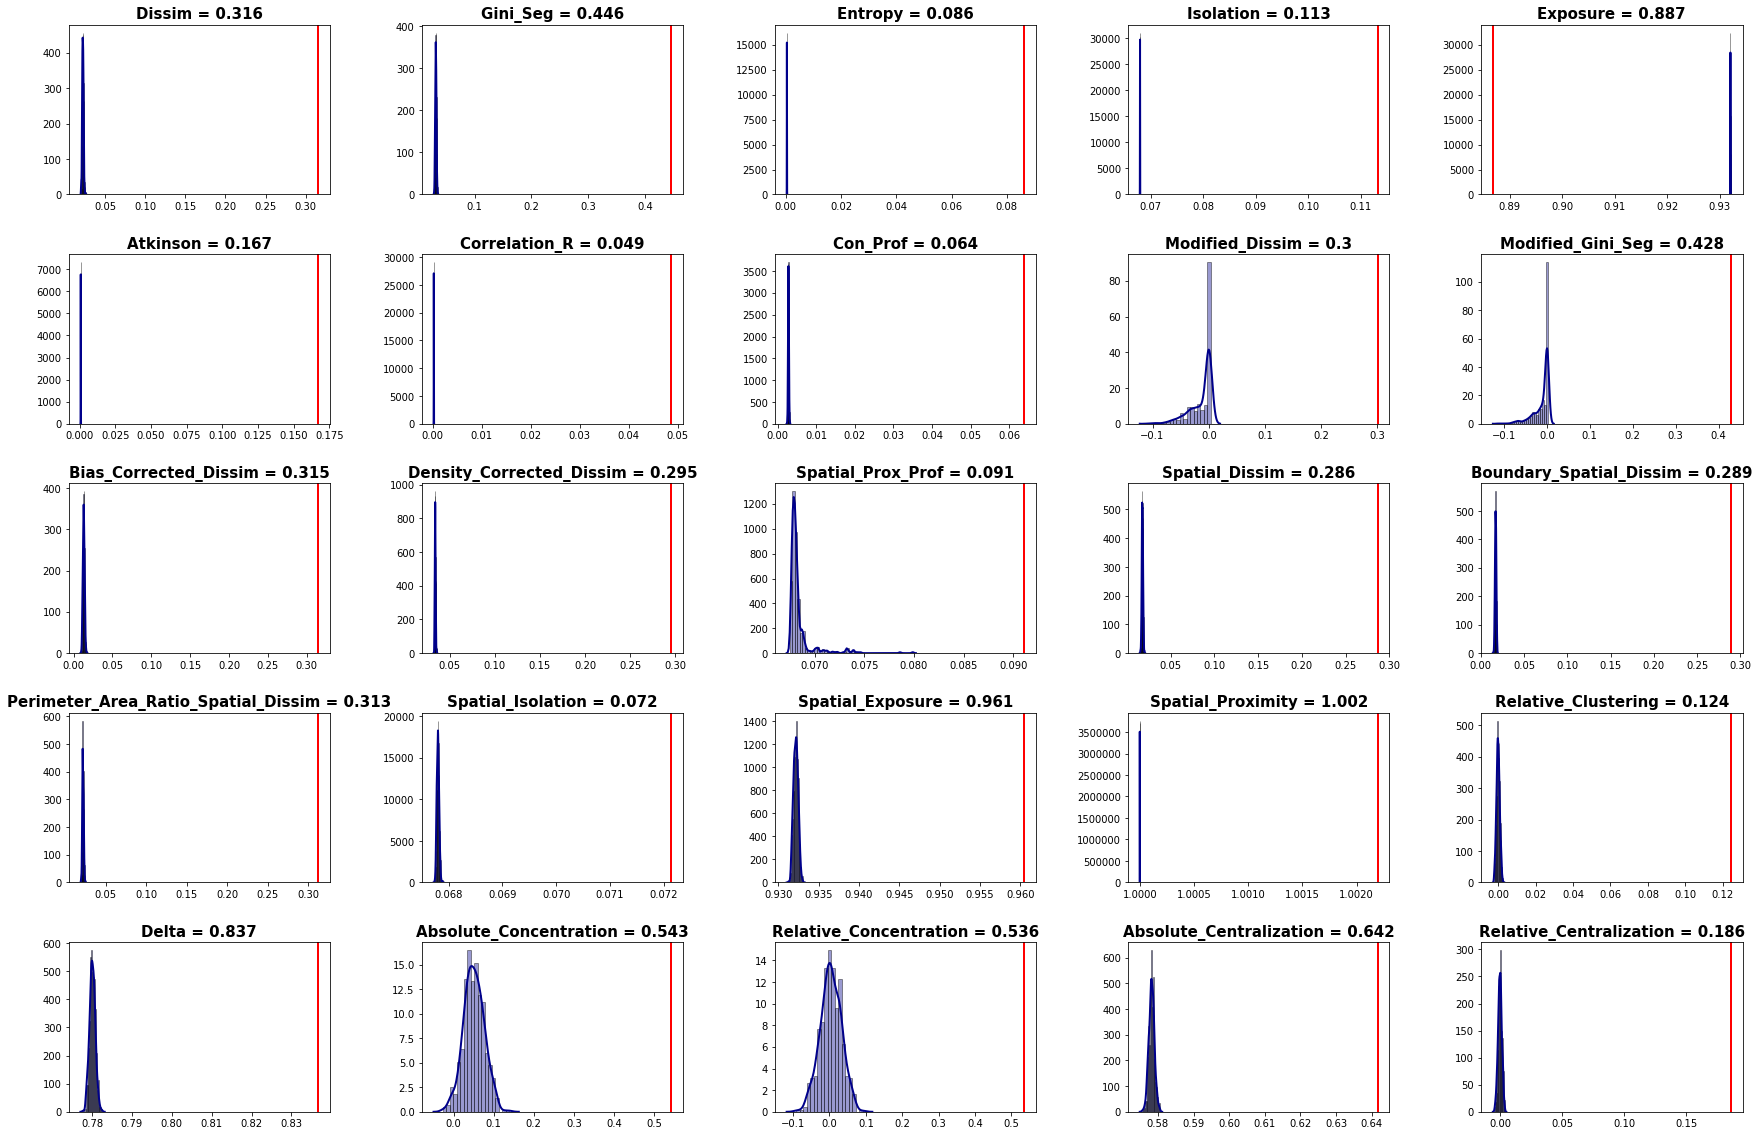

In [40]:
# Systematic Approach

# The iterator of the subplots is not zero index-based

fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(hspace = 0.35, wspace = 0.35) # hspace space between lines

t0 = time.time()

res_simul_sys = ()

for i in range(1, len(all_measures)+1):
    
    t0_i = time.time()
    aux = Infer_Segregation(all_measures[i-1], iterations = overall_iterations_frequency)
    t1_i = time.time()
    print('{} Time = {}'.format(aux._class_name, t1_i - t0_i))
    res_simul_sys += (aux, )
    
    ax = fig.add_subplot(5, 5, i)
    sns.distplot(aux.est_sim, 
                 color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2})
    plt.axvline(aux.statistic, color = 'red', linewidth = 2)
    plt.title('{} = {}'.format(aux._class_name, round(aux.statistic, 3)), fontweight = "bold", fontsize = 15)
    
t1 = time.time()

total = t1 - t0

print('Total Time = {}'.format(total))

# One-Third of the simulation time is only due to the Density Corrected Dissimilarity

### Riverside in 2010: Permutation approach

In [11]:
# Permutation Approach

# For permutation approach, we need to subset the all_measures object to only spatial measures

spatial_measures = (SPP, SD, BSD, PARD, SxPx, SxPy, SP, RCL, DEL, ACO, RCO, ACE, RCE)

Spatial_Prox_Prof Time = 249.9497992992401
Spatial_Dissim Time = 70.4457278251648
Boundary_Spatial_Dissim Time = 463.54678535461426
Perimeter_Area_Ratio_Spatial_Dissim Time = 468.0967674255371
Spatial_Isolation Time = 14.574040651321411
Spatial_Exposure Time = 14.775532960891724
Spatial_Proximity Time = 15.059760808944702
Relative_Clustering Time = 14.26791524887085
Delta Time = 2.928175210952759
Absolute_Concentration Time = 6.256274461746216
Relative_Concentration Time = 6.136628150939941
Absolute_Centralization Time = 13.157824039459229
Relative_Centralization Time = 13.160816192626953
Total Time = 1352.60311794281


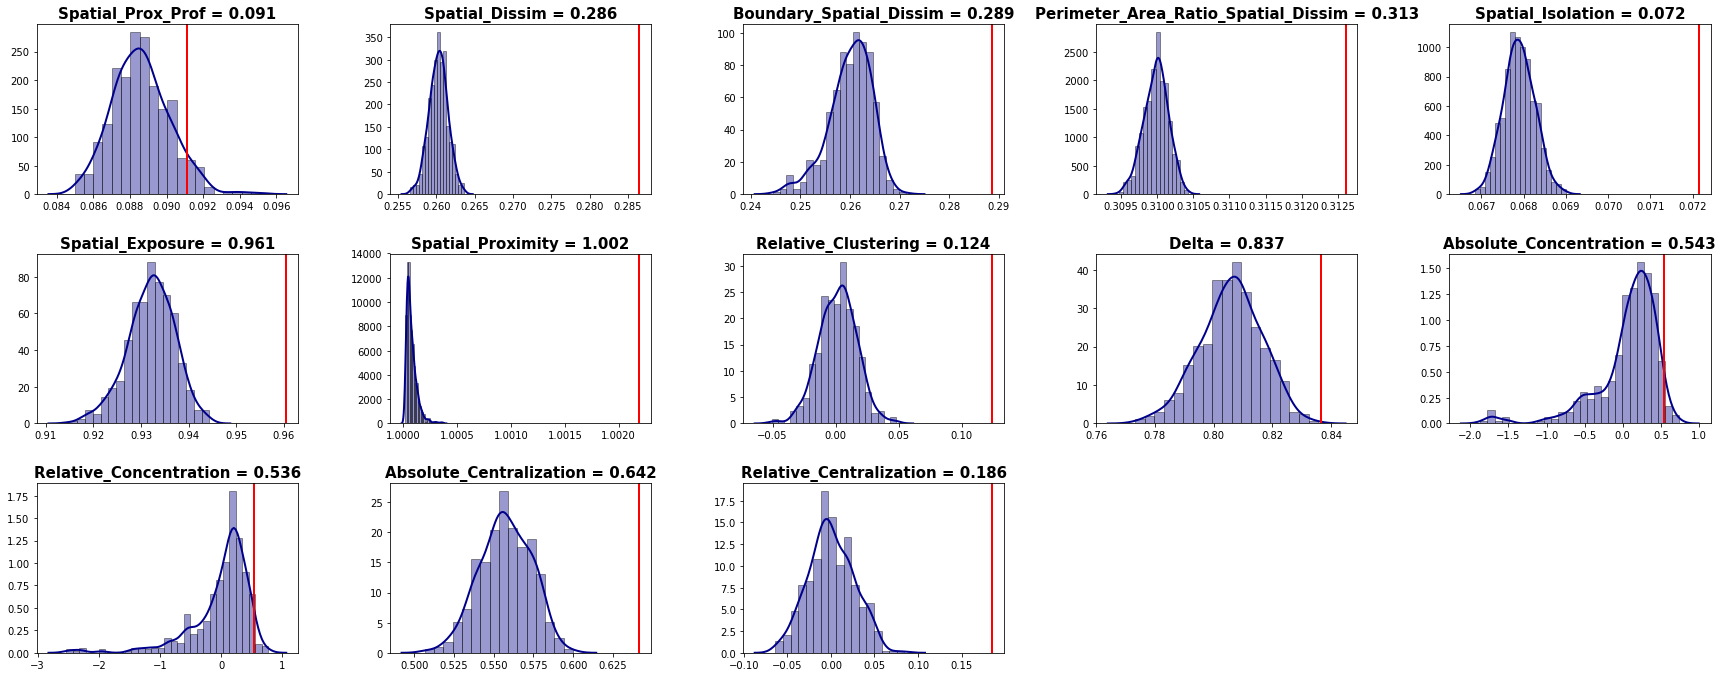

In [12]:
fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(hspace = 0.35, wspace = 0.35) # hspace space between lines

t0 = time.time()

res_simul_per = ()

for i in range(1, len(spatial_measures)+1):
    
    t0_i = time.time()
    aux = Infer_Segregation(spatial_measures[i-1], null_approach = "permutation", iterations = overall_iterations_frequency)
    t1_i = time.time()
    print('{} Time = {}'.format(aux._class_name, t1_i - t0_i))
    res_simul_per += (aux, )
    
    ax = fig.add_subplot(5, 5, i)
    sns.distplot(aux.est_sim, 
                 color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2})
    plt.axvline(aux.statistic, color = 'red', linewidth = 2)
    plt.title('{} = {}'.format(aux._class_name, round(aux.statistic, 3)), fontweight = "bold", fontsize = 15)
    
t1 = time.time()

total = t1 - t0

print('Total Time = {}'.format(total))

### Riverside against itself: Random Data approach

In [13]:
census_2000 = pd.read_csv("C:/Users/renan/Desktop/full_count_2010/LTDB_Std_2000_fullcount.csv", encoding = "ISO-8859-1", sep = ",")

# Some population data for 2000 came as decimals
census_2000['pop00']   = round(census_2000['POP00']).astype(int)
census_2000['nhblk00'] = round(census_2000['NHBLK00']).astype(int)
census_2000['trtid10'] = census_2000['TRTID10']
gdf_2000 = map_gpd.merge(census_2000, left_on = 'INTGEOID10', right_on = 'trtid10')[['geometry', 'nhblk00', 'pop00']]

In [14]:
gdf_2000['share'] = np.where(gdf_2000['pop00'] == 0, 0, gdf_2000['nhblk00'] / gdf_2000['nhblk00'].sum())
gdf_2000['rel']   = np.where(gdf_2000['pop00'] == 0, 0, gdf_2000['nhblk00'] / gdf_2000['pop00'])

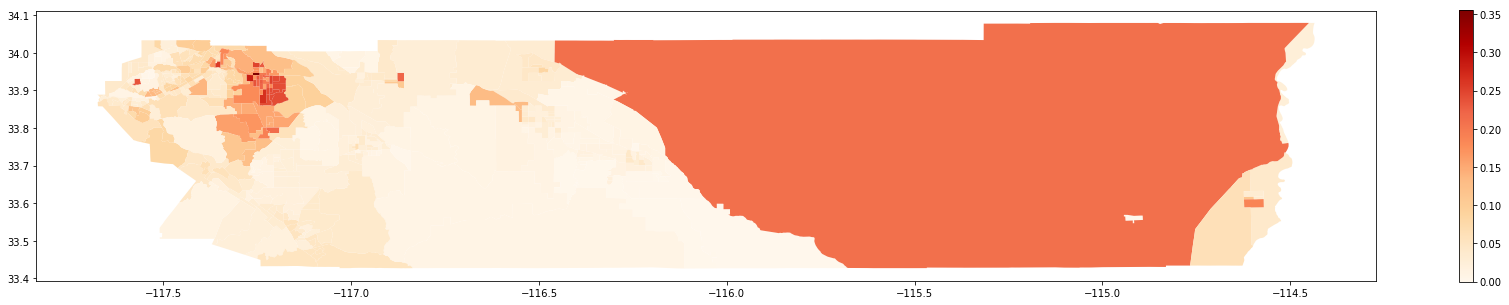

In [15]:
ax1 = gdf_2000.plot(column='rel',
                    cmap = 'OrRd', 
                    figsize=(30,5),
                    legend = True)

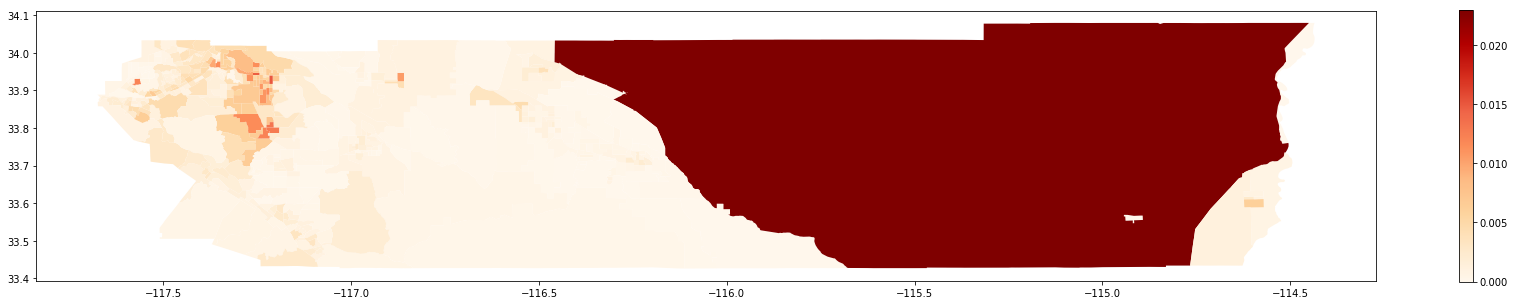

In [16]:
ax1 = gdf_2000.plot(column='share',
                    cmap = 'OrRd', 
                    figsize=(30,5),
                    legend = True)

In [17]:
# Non-Spatial measures
D_2000 = Dissim(gdf_2000, 'nhblk00', 'pop00')
G_2000 = Gini_Seg(gdf_2000, 'nhblk00', 'pop00')
H_2000 = Entropy(gdf_2000, 'nhblk00', 'pop00')
A_2000 = Atkinson(gdf_2000, 'nhblk00', 'pop00')
xPy_2000 = Exposure(gdf_2000, 'nhblk00', 'pop00')
xPx_2000 = Isolation(gdf_2000, 'nhblk00', 'pop00')
R_2000 = Con_Prof(gdf_2000, 'nhblk00', 'pop00')
Dbc_2000 = Bias_Corrected_Dissim(gdf_2000, 'nhblk00', 'pop00')
Ddc_2000 = Density_Corrected_Dissim(gdf_2000, 'nhblk00', 'pop00')
V_2000 = Correlation_R(gdf_2000, 'nhblk00', 'pop00')
Dct_2000 = Modified_Dissim(gdf_2000, 'nhblk00', 'pop00')
Gct_2000 = Modified_Gini_Seg(gdf_2000, 'nhblk00', 'pop00')

In [18]:
# Spatial measures
SD_2000 = Spatial_Dissim(gdf_2000, 'nhblk00', 'pop00')
PARD_2000 = Perimeter_Area_Ratio_Spatial_Dissim(gdf_2000, 'nhblk00', 'pop00')
BSD_2000 = Boundary_Spatial_Dissim(gdf_2000, 'nhblk00', 'pop00')
ACE_2000 = Absolute_Centralization(gdf_2000, 'nhblk00', 'pop00')
ACO_2000 = Absolute_Concentration(gdf_2000, 'nhblk00', 'pop00')
DEL_2000 = Delta(gdf_2000, 'nhblk00', 'pop00')
RCE_2000 = Relative_Centralization(gdf_2000, 'nhblk00', 'pop00')
RCL_2000 = Relative_Clustering(gdf_2000, 'nhblk00', 'pop00')
RCO_2000 = Relative_Concentration(gdf_2000, 'nhblk00', 'pop00')
SxPy_2000 = Spatial_Exposure(gdf_2000, 'nhblk00', 'pop00')
SxPx_2000 = Spatial_Isolation(gdf_2000, 'nhblk00', 'pop00')
SPP_2000 = Spatial_Prox_Prof(gdf_2000, 'nhblk00', 'pop00')
SP_2000 = Spatial_Proximity(gdf_2000, 'nhblk00', 'pop00')

In [21]:
all_measures_2000 = (D_2000, G_2000, H_2000, xPx_2000, xPy_2000, A_2000, V_2000, R_2000, Dct_2000, Gct_2000, Dbc_2000, Ddc_2000, SPP_2000, SD_2000, BSD_2000, PARD_2000, SxPx_2000, SxPy_2000, SP_2000, RCL_2000, DEL_2000, ACO_2000, RCO_2000, ACE_2000, RCE_2000)

Dissim Time = 5.059507131576538
Gini_Seg Time = 7.3224403858184814
Entropy Time = 6.078782796859741
Isolation Time = 4.970714330673218
Exposure Time = 4.98962926864624
Atkinson Time = 5.188131332397461
Correlation_R Time = 4.788231372833252
Con_Prof Time = 426.7331681251526
Modified_Dissim Time = 1292.140121459961
Modified_Gini_Seg Time = 2416.8417961597443
Bias_Corrected_Dissim Time = 1210.00634431839
Density_Corrected_Dissim Time = 5854.952105760574
Spatial_Prox_Prof Time = 495.5901219844818
Spatial_Dissim Time = 143.00568795204163
Boundary_Spatial_Dissim Time = 923.9699320793152
Perimeter_Area_Ratio_Spatial_Dissim Time = 928.9616086483002
Spatial_Isolation Time = 30.138453245162964
Spatial_Exposure Time = 30.451610326766968
Spatial_Proximity Time = 31.00816011428833
Relative_Clustering Time = 29.312657594680786
Delta Time = 6.79184365272522
Absolute_Concentration Time = 13.674439430236816
Relative_Concentration Time = 13.328402757644653
Absolute_Centralization Time = 27.303977012634

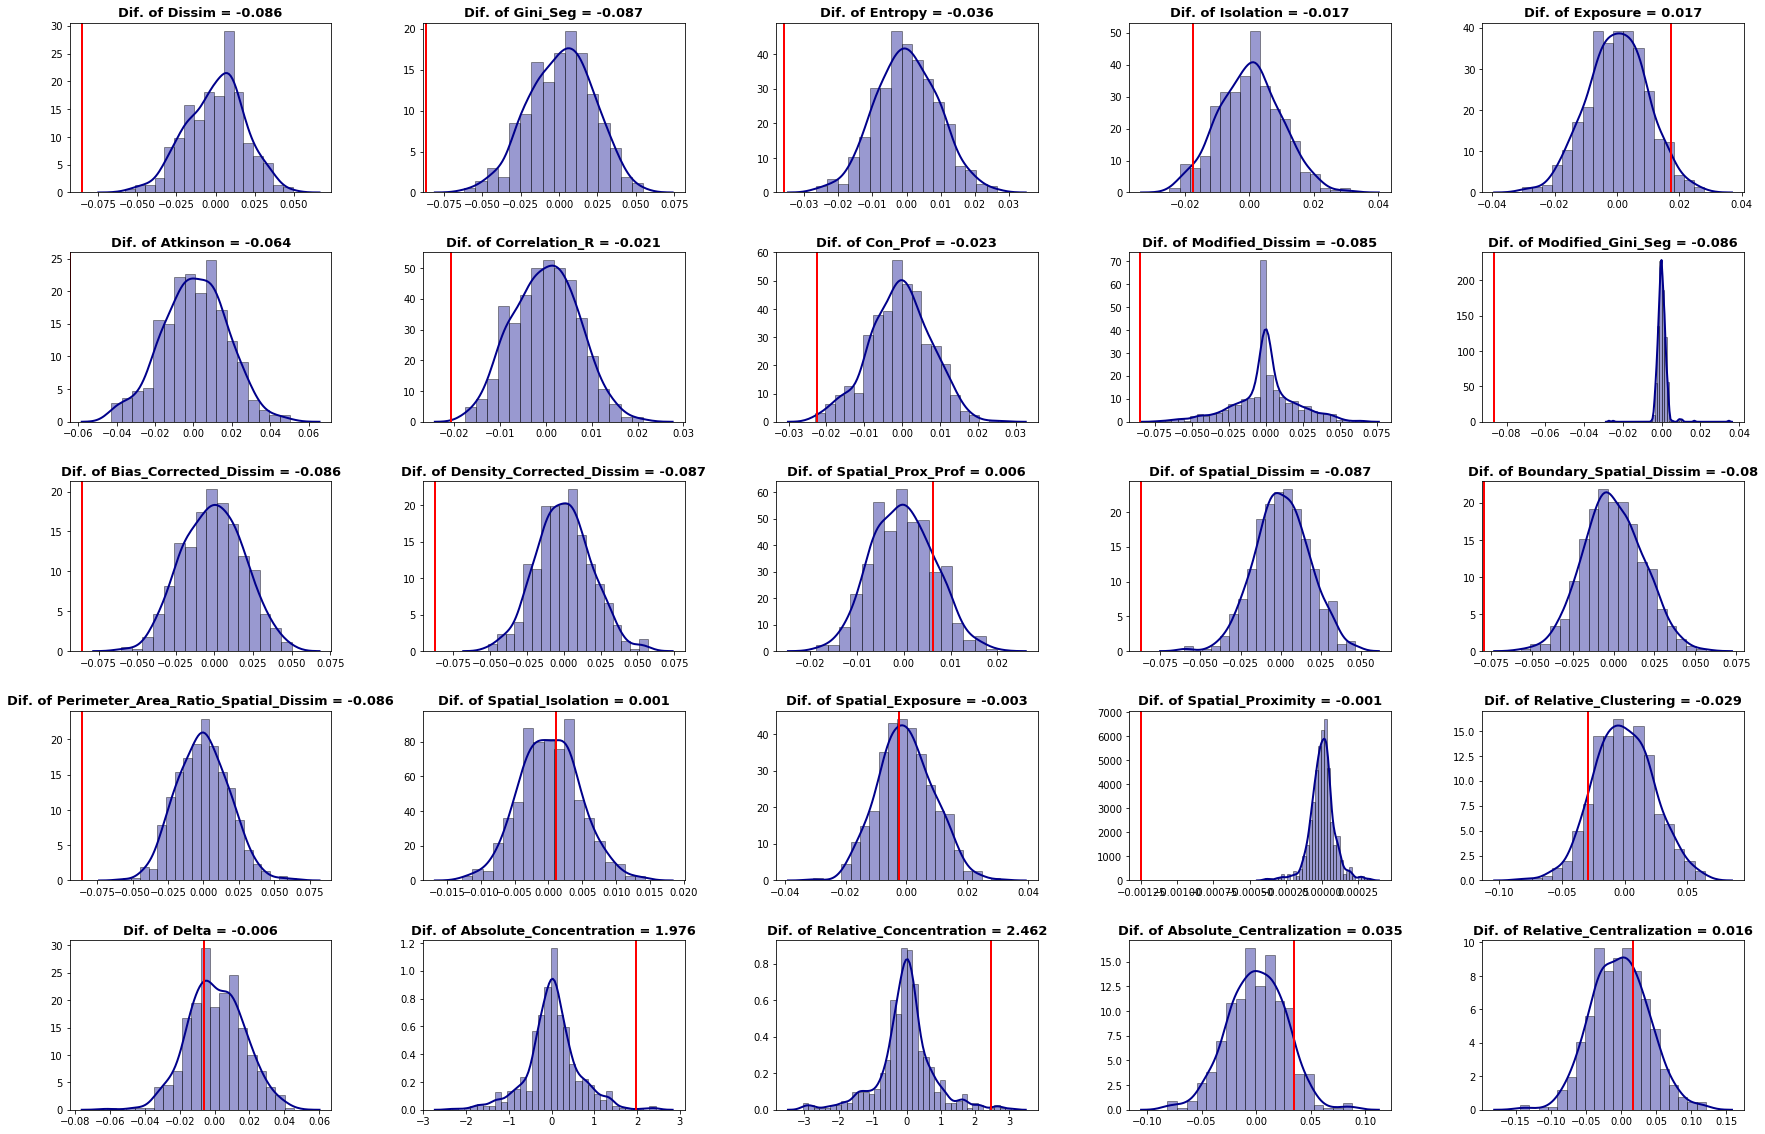

In [22]:
fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(hspace = 0.35, wspace = 0.35) # hspace space between lines

t0 = time.time()

res_simul_two_periods_random_data = (aux, )

for i in range(1, len(all_measures)+1):
    
    t0_i = time.time()
    aux = Compare_Segregation(all_measures[i-1], all_measures_2000[i-1], iterations = overall_iterations_frequency)
    t1_i = time.time()
    print('{} Time = {}'.format(aux._class_name, t1_i - t0_i))
    res_simul_two_periods_random_data += (aux, )
    
    ax = fig.add_subplot(5, 5, i)
    sns.distplot(aux.est_sim, 
                 color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2})
    plt.axvline(aux.est_point_diff, color = 'red', linewidth = 2)
    plt.title('Dif. of {} = {}'.format(aux._class_name, round(aux.est_point_diff, 3)), fontweight = "bold", fontsize = 13)
    
t1 = time.time()

total = t1 - t0
print('Total Time = {}'.format(total))

# Half of the Time is just the Density Corrected Dissimilarity

### Riverside against San Bernardino in 2010: random data approach

In [23]:
df = census_2010.loc[census_2010.county == "San Bernardino County"][['trtid10', 'pop10','nhblk10']]

sb_map_url = 'https://raw.githubusercontent.com/renanxcortes/inequality-segregation-supplementary-files/master/Tracts_grouped_by_County/06071.json'
sb_map_gpd = gpd.read_file(sb_map_url)
sb_map_gpd['INTGEOID10'] = pd.to_numeric(sb_map_gpd["GEOID10"])
sb_gdf_pre = sb_map_gpd.merge(df, left_on = 'INTGEOID10', right_on = 'trtid10')
sb_gdf = sb_gdf_pre[['geometry', 'pop10', 'nhblk10']]

sb_gdf['share'] = np.where(sb_gdf['pop10'] == 0, 0, sb_gdf['nhblk10'] / sb_gdf['nhblk10'].sum())
sb_gdf['rel']   = np.where(sb_gdf['pop10'] == 0, 0, sb_gdf['nhblk10'] / sb_gdf['pop10'])

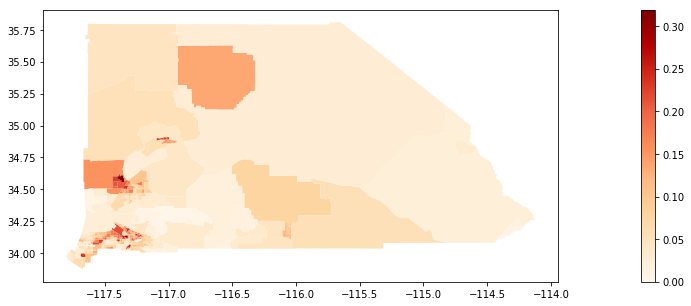

In [24]:
ax1 = sb_gdf.plot(column='rel',
                  cmap = 'OrRd', 
                  figsize=(30,5),
                  legend = True)

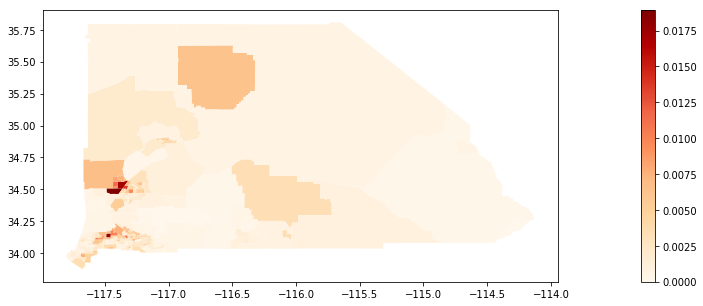

In [25]:
ax1 = sb_gdf.plot(column='share',
                  cmap = 'OrRd', 
                  figsize=(30,5),
                  legend = True)

In [26]:
# Non-Spatial measures
sb_D = Dissim(sb_gdf, 'nhblk10', 'pop10')
sb_G = Gini_Seg(sb_gdf, 'nhblk10', 'pop10')
sb_H = Entropy(sb_gdf, 'nhblk10', 'pop10')
sb_A = Atkinson(sb_gdf, 'nhblk10', 'pop10')
sb_xPy = Exposure(sb_gdf, 'nhblk10', 'pop10')
sb_xPx = Isolation(sb_gdf, 'nhblk10', 'pop10')
sb_R = Con_Prof(sb_gdf, 'nhblk10', 'pop10')
sb_Dbc = Bias_Corrected_Dissim(sb_gdf, 'nhblk10', 'pop10')
sb_Ddc = Density_Corrected_Dissim(sb_gdf, 'nhblk10', 'pop10')
sb_V = Correlation_R(sb_gdf, 'nhblk10', 'pop10')
sb_Dct = Modified_Dissim(sb_gdf, 'nhblk10', 'pop10')
sb_Gct = Modified_Gini_Seg(sb_gdf, 'nhblk10', 'pop10')

In [27]:
# Spatial measures
sb_SD = Spatial_Dissim(sb_gdf, 'nhblk10', 'pop10')
sb_PARD = Perimeter_Area_Ratio_Spatial_Dissim(sb_gdf, 'nhblk10', 'pop10')
sb_BSD = Boundary_Spatial_Dissim(sb_gdf, 'nhblk10', 'pop10')
sb_ACE = Absolute_Centralization(sb_gdf, 'nhblk10', 'pop10')
sb_ACO = Absolute_Concentration(sb_gdf, 'nhblk10', 'pop10')
sb_DEL = Delta(sb_gdf, 'nhblk10', 'pop10')
sb_RCE = Relative_Centralization(sb_gdf, 'nhblk10', 'pop10')
sb_RCL = Relative_Clustering(sb_gdf, 'nhblk10', 'pop10')
sb_RCO = Relative_Concentration(sb_gdf, 'nhblk10', 'pop10')
sb_SxPy = Spatial_Exposure(sb_gdf, 'nhblk10', 'pop10')
sb_SxPx = Spatial_Isolation(sb_gdf, 'nhblk10', 'pop10')
sb_SPP = Spatial_Prox_Prof(sb_gdf, 'nhblk10', 'pop10')
sb_SP = Spatial_Proximity(sb_gdf, 'nhblk10', 'pop10')

In [28]:
sb_all_measures = (sb_D, sb_G, sb_H, sb_xPx, sb_xPy, sb_A, sb_V, sb_R, sb_Dct, sb_Gct, sb_Dbc, sb_Ddc, sb_SPP, sb_SD, sb_BSD, sb_PARD, sb_SxPx, sb_SxPy, sb_SP, sb_RCL, sb_DEL, sb_ACO, sb_RCO, sb_ACE, sb_RCE)

Dissim Time = 4.801133155822754
Gini_Seg Time = 6.6751556396484375
Entropy Time = 5.514261722564697
Isolation Time = 4.642590522766113
Exposure Time = 4.9816813468933105
Atkinson Time = 5.198095798492432
Correlation_R Time = 4.7303853034973145
Con_Prof Time = 432.2155442237854
Modified_Dissim Time = 1291.131412267685
Modified_Gini_Seg Time = 2183.176677465439
Bias_Corrected_Dissim Time = 1192.3484899997711
Density_Corrected_Dissim Time = 5400.119688510895
Spatial_Prox_Prof Time = 470.478289604187
Spatial_Dissim Time = 141.87173008918762
Boundary_Spatial_Dissim Time = 907.4546890258789
Perimeter_Area_Ratio_Spatial_Dissim Time = 911.706868648529
Spatial_Isolation Time = 27.50048303604126
Spatial_Exposure Time = 27.742834091186523
Spatial_Proximity Time = 28.294358730316162
Relative_Clustering Time = 27.241174697875977
Delta Time = 6.641245126724243
Absolute_Concentration Time = 13.178768396377563
Relative_Concentration Time = 13.082057476043701
Absolute_Centralization Time = 25.901787519

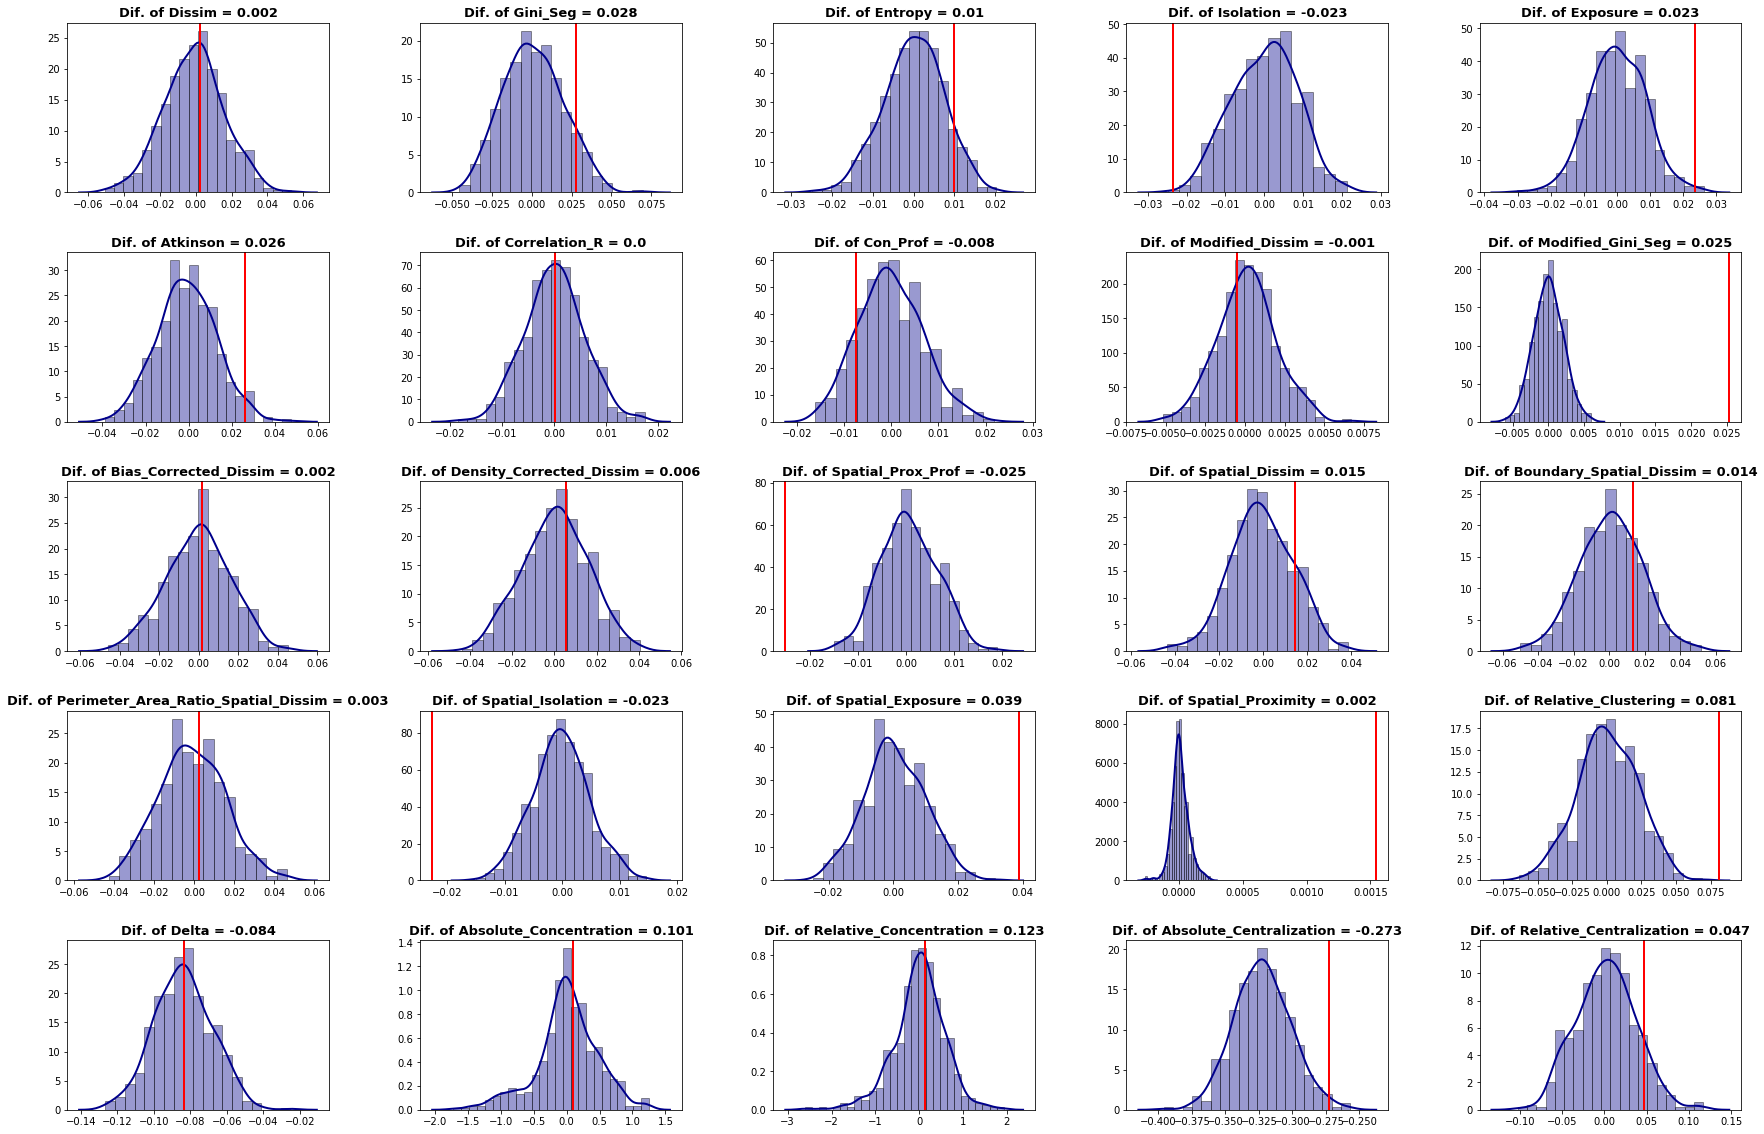

In [29]:
fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(hspace = 0.35, wspace = 0.35) # hspace space between lines

t0 = time.time()

res_simul_two_regions_random_data = (aux, )

for i in range(1, len(all_measures)+1):
    
    t0_i = time.time()
    aux = Compare_Segregation(all_measures[i-1], sb_all_measures[i-1], iterations = overall_iterations_frequency)
    t1_i = time.time()
    print('{} Time = {}'.format(aux._class_name, t1_i - t0_i))
    res_simul_two_regions_random_data += (aux, )
    
    ax = fig.add_subplot(5, 5, i)
    sns.distplot(aux.est_sim, 
                 color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2})
    plt.axvline(aux.est_point_diff, color = 'red', linewidth = 2)
    plt.title('Dif. of {} = {}'.format(aux._class_name, round(aux.est_point_diff, 3)), fontweight = "bold", fontsize = 13)
    
t1 = time.time()

total = t1 - t0
print('Total Time = {}'.format(total))

### Riverside against San Bernardino: Random Spatial approach

In [30]:
# fig = plt.figure(figsize=(30, 20))
# fig.subplots_adjust(hspace = 0.35, wspace = 0.35) # hspace space between lines

# t0 = time.time()

# for i in range(1, len(all_measures)+1):
#     t0_i = time.time()
#     aux = Compare_Segregation(all_measures[i-1], sb_all_measures[i-1], null_approach = "random_spatial", iterations = overall_iterations_frequency)
#     t1_i = time.time()
#     print('{} Time = {}'.format(aux._class_name, t1_i - t0_i))
#     ax = fig.add_subplot(5, 5, i)
#     sns.distplot(aux.est_sim, 
#                  color = 'darkblue', 
#                  hist_kws={'edgecolor':'black'},
#                  kde_kws={'linewidth': 2})
#     plt.axvline(aux.est_point_diff, color = 'red', linewidth = 2)
#     plt.title('Dif. of {} = {}'.format(aux._class_name, round(aux.est_point_diff, 3)), fontweight = "bold", fontsize = 13)
    
# t1 = time.time()

# total = t1 - t0
# print('Total Time = {}'.format(total))

In [ ]:
res_simul_sys[0].p_value